In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
boston = load_boston()

In [ ]:
boston.keys()

In [2]:
boston.shape

NameError: name 'boston' is not defined

In [3]:
data = pd.DataFrame(boston.data)

NameError: name 'boston' is not defined

In [4]:
data.columns = boston.feature_names

NameError: name 'boston' is not defined

In [5]:
data.head()

NameError: name 'data' is not defined

In [6]:
data.shape

NameError: name 'data' is not defined

In [7]:
data['PRICE'] = boston.target

NameError: name 'boston' is not defined

In [8]:
x = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

NameError: name 'data' is not defined

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.25,random_state=0)

NameError: name 'x' is not defined

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [11]:
model=lm.fit(xtrain, ytrain)

In [12]:

ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [13]:
print(model.coef_)
coeff_df=pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coeff_df

[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]


,Coefficient
CRIM,-0.117735
ZN,0.044017
INDUS,-0.005768
CHAS,2.393416
NOX,-15.589421
RM,3.768968
AGE,-0.007035
DIS,-1.434956
RAD,0.240081
TAX,-0.011297


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
print("Mean squared error:", mean_squared_error(ytrain, ytrain_pred ))
print("Mean squared error:", mean_squared_error(ytest, ytest_pred))

Mean squared error: 19.640519427908043
Mean squared error: 29.78224509230237


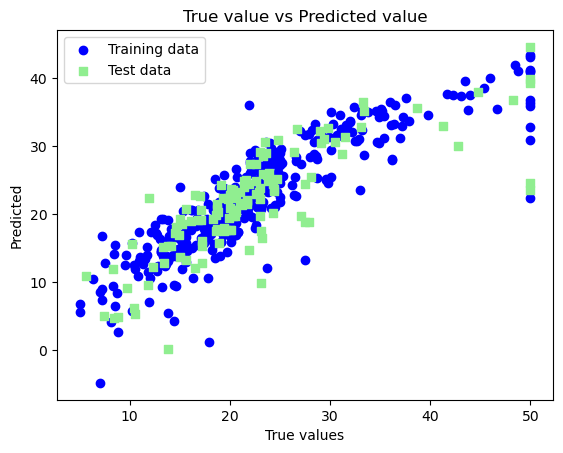

In [16]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
#plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()